<a href="https://colab.research.google.com/github/LuizP/Insight-Projects/blob/main/IP1_Segmenta%C3%A7%C3%A3o_de_Clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**O banco de dados bank-additional-full.csv/kaggle foi inicialmente criado para uma tarefa de classificação. Aqui irá se usar o banco de dados para segmentar clientes.**



In [3]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
bank_data =  pd.read_csv('/content/drive/MyDrive/portifólio/bank-additional-full.csv', sep=';') #o separador do arquivo é o ; então para criar-se o dataframe é necessário especificar o separador.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Perguntas para respoder:**

**1 - Qual o perfil dos clientes que aceitaram fazer o depósito de prazo?**
    -quais características em comum eles possuem 

**2 - Qual o perfil dos clientes que não aceitaram fazer o depósito de prazo?**

**3 - Qual o perfil geral dos clientes do banco?**

In [30]:
bank_data.shape #fornece as linhas e colunas do dataset
no_yes = bank_data['y'].value_counts()
no_yes.tolist()

[36548, 4640]

3 - Qual o perfil geral dos clientes do banco?

In [7]:
bank_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


1 - Qual o perfil dos clientes que aceitaram fazer o depósito de prazo?

In [ ]:
bank_data[bank_data['y']=='yes'].describe()


2 - Qual o perfil dos clientes que não aceitaram fazer o depósito de prazo?



In [ ]:
bank_data[bank_data['y']=='no'].describe()

In [92]:
bank_data.isnull().sum() #verificando se há valores nulos

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

**Obs1: a média de idade não varia entre as pessoa que aceitaram ou não fazer o depósito**

In [ ]:
bank_data.dtypes #verificando o tipo de cada coluna

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [38]:
marital = bank_data['marital'].value_counts()
print(marital)
marital.tolist()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64


[24928, 11568, 4612, 80]

**Divide-se as pessoas que disseram sim e não para saber o perfil de cada um a partir de suas características: idade, estado civil, escolaridade, etc.**


In [48]:
#[0, married]
#[1, single]
#[2, divorced]
#[3, unknown]

bank_data_no = bank_data[bank_data['y']=='no']
marital_no = bank_data_no['marital'].value_counts()
print('porcentagem das pessoas que disseram não')
print('casado', marital_no.tolist()[0]/no_yes.tolist()[0]) 
print('solteiro', marital_no.tolist()[1]/no_yes.tolist()[0]) 
print('divorciado', marital_no.tolist()[2]/no_yes.tolist()[0]) 
print('desconhecido', marital_no.tolist()[3]/no_yes.tolist()[0], '\n')
bank_data_yes = bank_data[bank_data['y']=='yes']
marital_yes = bank_data_yes['marital'].value_counts()
marital_yes.tolist()
print('porcentagem das pessoas que disseram sim')
print('casado', marital_yes.tolist()[0]/no_yes.tolist()[1])
print('solteiro', marital_yes.tolist()[1]/no_yes.tolist()[1])
print('divorciado', marital_yes.tolist()[2]/no_yes.tolist()[1])
print('desconhecido', marital_yes.tolist()[3]/no_yes.tolist()[1]) 

Divide-se as pessoas que disseram sim e não para saber o perfil de cada um a partir de suas características 

porcentagem das pessoas que disseram não
casado 0.6127831892306008
solteiro 0.2721899967166466
divorciado 0.11316624712706577
desconhecido 0.001860566925686768 

porcentagem das pessoas que disseram sim
casado 0.5456896551724137
solteiro 0.34913793103448276
divorciado 0.10258620689655172
desconhecido 0.002586206896551724


In [57]:
bank_data_yes['job'].value_counts()

admin.           1352
technician        730
blue-collar       638
retired           434
management        328
services          323
student           275
self-employed     149
unemployed        144
entrepreneur      124
housemaid         106
unknown            37
Name: job, dtype: int64

In [60]:
bank_data_no = bank_data[bank_data['y']=='no']
job_no = bank_data_no['job'].value_counts()
print('porcentagem das pessoas que disseram não')
print('admin.', job_no.tolist()[0]/no_yes.tolist()[0]) 
print('blue-collar', job_no.tolist()[1]/no_yes.tolist()[0]) 
print('technician', job_no.tolist()[2]/no_yes.tolist()[0]) 
print('services', job_no.tolist()[3]/no_yes.tolist()[0])
print('management', job_no.tolist()[4]/no_yes.tolist()[0]) 
print('entrepreneur', job_no.tolist()[5]/no_yes.tolist()[0]) 
print('retired', job_no.tolist()[6]/no_yes.tolist()[0]) 
print('self-employed', job_no.tolist()[7]/no_yes.tolist()[0])
print('housemaid', job_no.tolist()[8]/no_yes.tolist()[0]) 
print('unemployed', job_no.tolist()[9]/no_yes.tolist()[0]) 
print('student', job_no.tolist()[10]/no_yes.tolist()[0]) 
print('unknown', job_no.tolist()[11]/no_yes.tolist()[0], '\n')

bank_data_yes = bank_data[bank_data['y']=='yes']
job_yes = bank_data_yes['job'].value_counts()
print('porcentagem das pessoas que disseram sim')
print('admin', job_yes.tolist()[0]/no_yes.tolist()[1])
print('technician', job_yes.tolist()[1]/no_yes.tolist()[1])
print('blue-collar ', job_yes.tolist()[2]/no_yes.tolist()[1])
print('retired', job_yes.tolist()[3]/no_yes.tolist()[1])
print('management', job_yes.tolist()[4]/no_yes.tolist()[1])
print('entrepreneur', job_yes.tolist()[5]/no_yes.tolist()[1])
print('retired', job_yes.tolist()[6]/no_yes.tolist()[1])
print('self-employed', job_yes.tolist()[7]/no_yes.tolist()[1]) 
print('housemaid', job_yes.tolist()[8]/no_yes.tolist()[1])
print('unemployed', job_yes.tolist()[9]/no_yes.tolist()[1])
print('student', job_yes.tolist()[10]/no_yes.tolist()[1])
print('unknown', job_yes.tolist()[11]/no_yes.tolist()[1], '\n')  



porcentagem das pessoas que disseram não
admin. 0.24816679435263214
blue-collar 0.2357447739958411
technician 0.16452336653168437
services 0.09975922075079348
management 0.07102987851592427
entrepreneur 0.03644522272080552
retired 0.03518660391813506
self-employed 0.034803546021670136
housemaid 0.0261026595162526
unemployed 0.023804312137463063
student 0.016416766991353835
unknown 0.008016854547444456 

porcentagem das pessoas que disseram sim
admin 0.2913793103448276
technician 0.15732758620689655
blue-collar  0.1375
retired 0.0935344827586207
management 0.0706896551724138
entrepreneur 0.06961206896551723
retired 0.059267241379310345
self-employed 0.03211206896551724
housemaid 0.03103448275862069
unemployed 0.026724137931034484
student 0.022844827586206897
unknown 0.007974137931034483 



**Obs2: Ser solteiro é um bom indicativo que você pode dizer sim para a proposta de depósito de prazo**

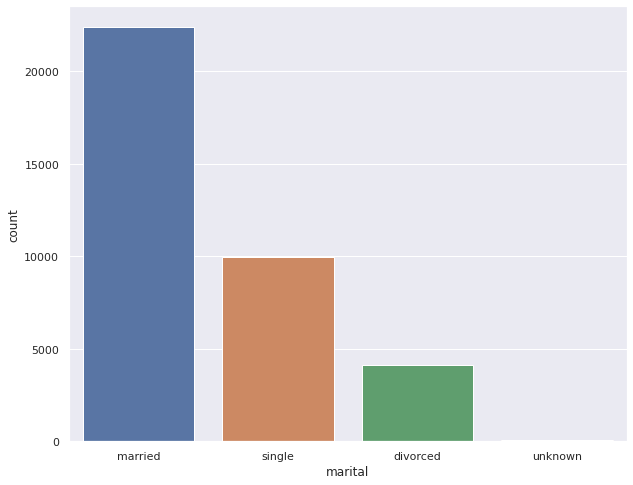

In [91]:
import seaborn as sns
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="marital", data=bank_data_no,
                   order = bank_data_no['marital'].value_counts().index)

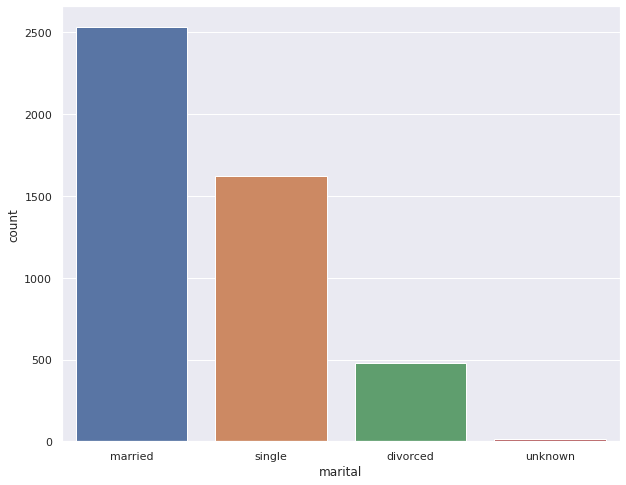

In [90]:
ax = sns.countplot(x="marital", data=bank_data_yes,
                   order = bank_data_yes['marital'].value_counts().index)

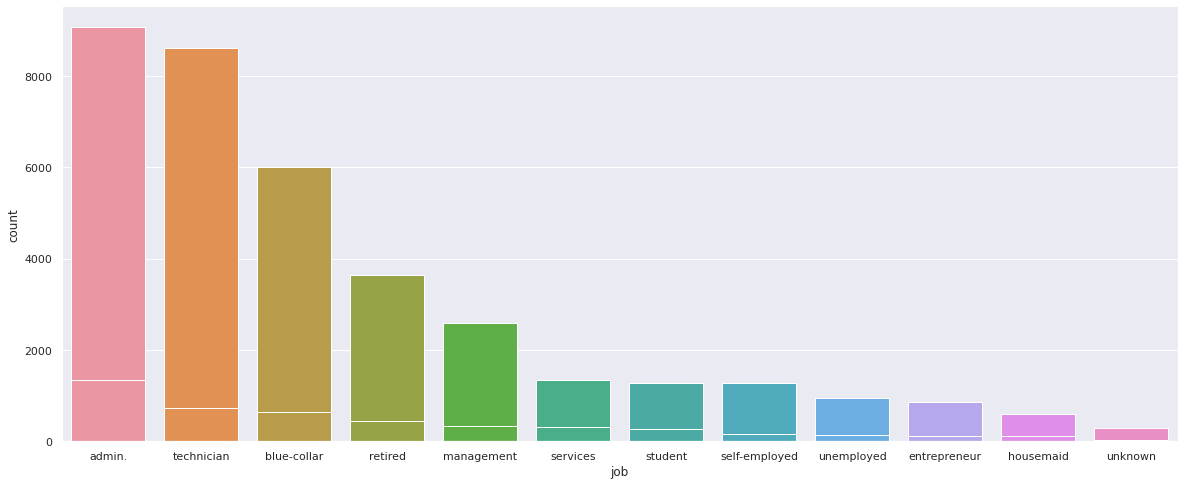

In [72]:
sns.set(rc={'figure.figsize':(20,8)})
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="job", data=bank_data_no,
                   order = bank_data_no['job'].value_counts().index)



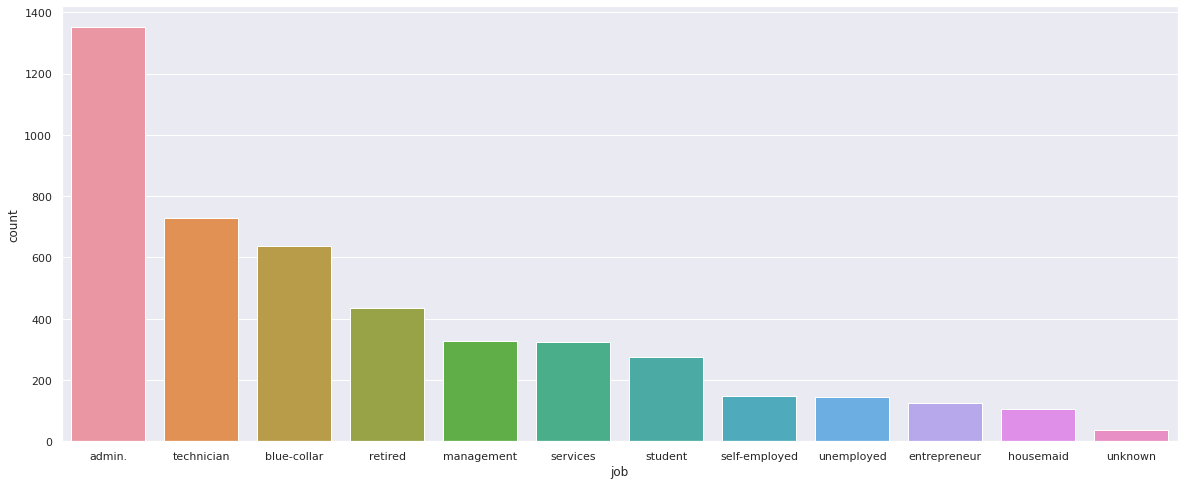

In [71]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="job", data=bank_data_yes,
                   order = bank_data_yes['job'].value_counts().index)

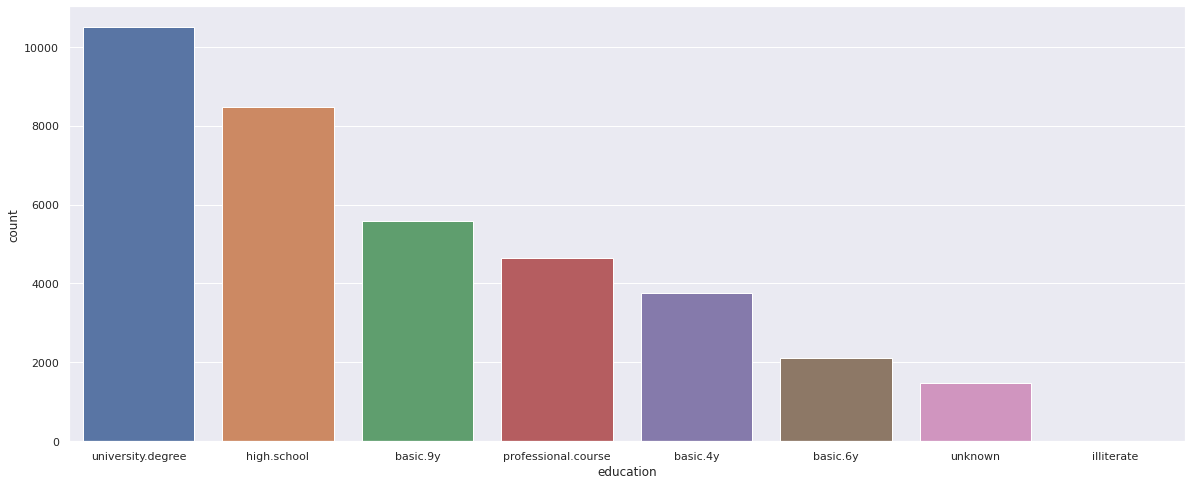

In [83]:
sns.set(rc={'figure.figsize':(20,8)})
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="education", data=bank_data_no,
                   order = bank_data_no['education'].value_counts().index)

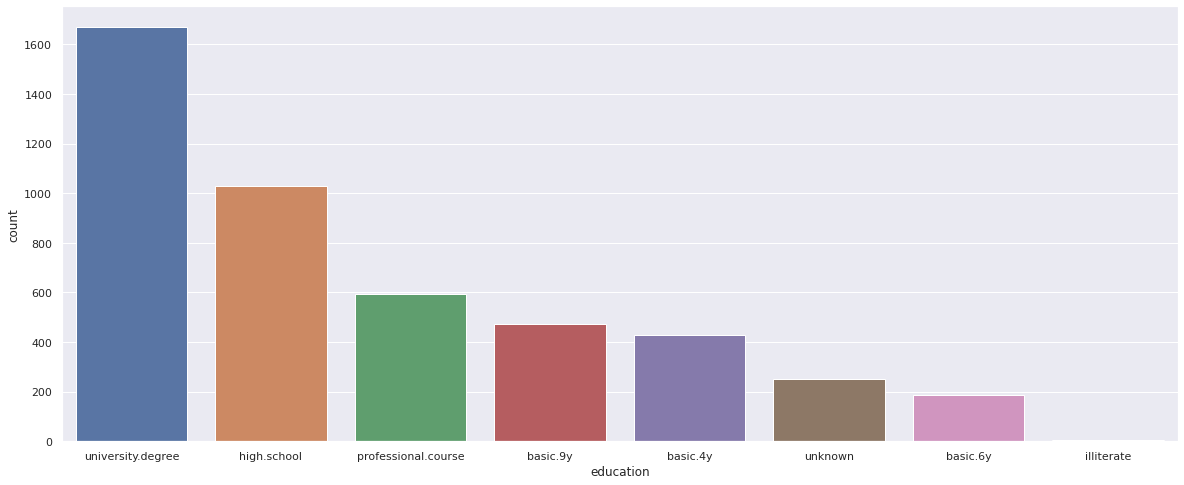

In [84]:
sns.set(rc={'figure.figsize':(20,8)})
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="education", data=bank_data_yes,
                   order = bank_data_yes['education'].value_counts().index)

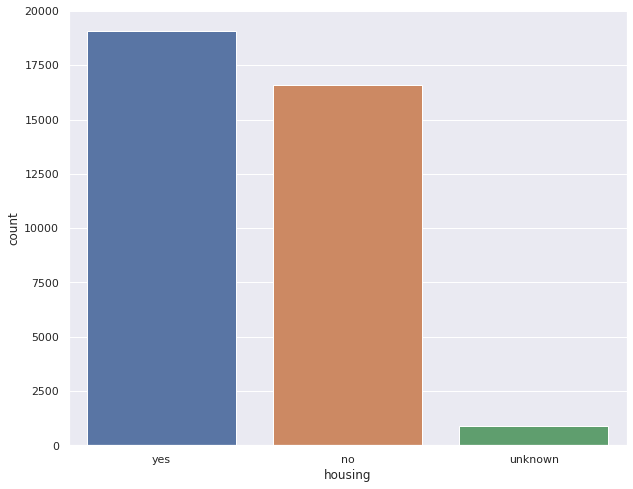

In [89]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="housing", data=bank_data_no,
                   order = bank_data_no['housing'].value_counts().index)

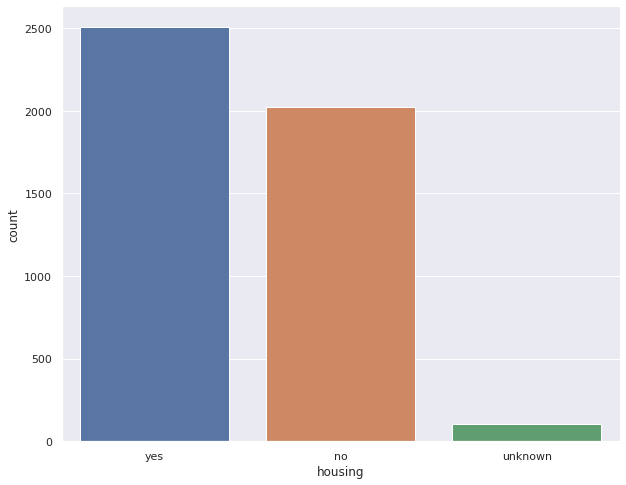

In [88]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="housing", data=bank_data_yes,
                   order = bank_data_yes['housing'].value_counts().index)

**Pergunta 4 - Será que uma clusterização informará com melhor clareza quem são o grupo de pessoas que merece um foco maior da empresa? Continua no próximo episódio**